#read the readme to know exactly what code is doing. 

Here is the breakdown of how I want to build the code. 

- We will use requests to load the first page of the results. 
- Store the links to each job description. I don't want to use the in page feature of the job description. That makes the HTML too complicated.
- Once we have the links, use requests to get content for each one. 
- Use beutiful soup to scrape the job description. 
- The idea is to give the user the choice of skills he wants the summary. For the initial process I will provide a list of skills and check the results to see if everything works clearly. Then move on to user inputs. 
- Once the code works for let's say 10 or 20 job searches, we can scale it to incorporate more companies.
- Be ethical. I will keep a cap on how many companies we can search in the end. Let's not be scummy and inundate the indeed server.


In [1]:
#let's begin 

import pyforest 
import requests
from IPython.display import Image
from bs4 import BeautifulSoup

In [2]:
job_page = requests.get('https://www.indeed.com/jobs?q=data+scientist&l=United+States')
job_page

<Response [200]>

In [3]:
first_page_content = job_page.text

In [4]:
parser = BeautifulSoup(first_page_content, 'html.parser')

In [5]:
test = parser.body.find('div', attrs = {'data-tn-component':'organicJob'})

In [6]:
test_job_title = test.a.text.strip()
test_job_title

'Data Scientist - Analytics'

In [7]:
job_link = test.a.get('href')

In [8]:
job_link

'/rc/clk?jk=3d5724ad39c214bb&fccid=9993304a3df214bf&vjs=3'

So we pretty much figured out how to get the job name and link. 

In [9]:
company_name = test.div.span.text.strip()
company_name

'Acorn Analytics'

Now let's check if the same code can work for the rest of the job listings. 

In [10]:
test2 = parser.body.find_all('div', attrs = {'data-tn-component':'organicJob'})

In [11]:
len(test2)

10

In [12]:
test2[1].a.text.strip()

'Data Scientist (entry level)'

In [13]:
test2[3].a.text.strip()

'Data Scientist in Genomics. Expert in Machine and Deep ML in...'

In [14]:
test2[6].a.text.strip()

'Data Scientist'

Works so far. One issue that is arising is not every job has the div-tn-component attribute. We can choose to ignore this since we will be looking at quite a number of jobs. Indeed has 15 job listings per page. As of this code some jobs are being scraped and some aren't. I'm continuing and will come back to see if I can change something. Ok let put this in a loop and see if it works. 

____________________________________________________________________________________________

In [15]:
job_table = pd.DataFrame(columns = ['Job Title','Organization','Link'])

<IPython.core.display.Javascript object>

In [16]:
job_table

,Job Title,Organization,Link


In [17]:
scraped_page = parser.body.find_all('div', attrs = {'data-tn-component':'organicJob'})

In [18]:
titles = []
orgs = []
clean_links = []
    
for job in scraped_page:
    
    title = job.a.text.strip()
    titles.append(title)
    
    org = job.div.span.text.strip()
    orgs.append(org)
    
    link = job.a.get('href')
    
    if link.startswith('https'):
        clean_links.append(link)
    else:
        join_link = "https://www.indeed.com"+link
        clean_links.append(join_link)

In [19]:
clean_links

['https://www.indeed.com/rc/clk?jk=3d5724ad39c214bb&fccid=9993304a3df214bf&vjs=3',
 'https://www.indeed.com/rc/clk?jk=10ce94304e4f3254&fccid=e34a8bfa908cfda2&vjs=3',
 'https://www.indeed.com/rc/clk?jk=97ba8c5ac004f4e4&fccid=734cb5a01ee60f80&vjs=3',
 'https://www.indeed.com/company/GATACA/jobs/Data-Scientist-Genomic-Expert-Machine-Deep-Ml-Omic-2279e13797bfa717?fccid=9a4feb43537f1383&vjs=3',
 'https://www.indeed.com/company/Eateam/jobs/Data-Scientist-1c9685211454261a?fccid=50b31c1f60e549ba&vjs=3',
 'https://www.indeed.com/rc/clk?jk=abb4a8359abeeb2e&fccid=fe2d21eef233e94a&vjs=3',
 'https://www.indeed.com/company/C2S-Technologies/jobs/Data-Scientist-9d198a5949bdec9c?fccid=eb4bc656c7659573&vjs=3',
 'https://www.indeed.com/company/WithHealth,-Inc./jobs/Senior-Data-Scientist-1b9a2896f416c9f5?fccid=afbf73832175724f&vjs=3',
 'https://www.indeed.com/rc/clk?jk=f2e1b49a9347924c&fccid=cbfa56f19cc95796&vjs=3',
 'https://www.indeed.com/company/WTF-DIGITAL/jobs/Data-Scientist-dda20b6589d3de4f?fccid=80

In [20]:
job_table['Job Title'] = titles
job_table['Organization'] = orgs
job_table['Link'] = clean_links

In [21]:
job_table

,Job Title,Organization,Link
0,Data Scientist - Analytics,Acorn Analytics,https://www.indeed.com/rc/clk?jk=3d5724ad39c21...
1,Data Scientist (entry level),Saturn Cloud,https://www.indeed.com/rc/clk?jk=10ce94304e4f3...
2,Full Time Opportunities for PhD Students or Re...,Microsoft,https://www.indeed.com/rc/clk?jk=97ba8c5ac004f...
3,Data Scientist in Genomics. Expert in Machine ...,GATACA,https://www.indeed.com/company/GATACA/jobs/Dat...
4,Data Scientist,Eateam,https://www.indeed.com/company/Eateam/jobs/Dat...
5,"Data Scientist, Amazon Studios",Amazon Studios LLC,https://www.indeed.com/rc/clk?jk=abb4a8359abee...
6,Data Scientist,C2S Technologies,https://www.indeed.com/company/C2S-Technologie...
7,Sr. Data Scientist,"WithHealth, Inc.","https://www.indeed.com/company/WithHealth,-Inc..."
8,Data Scientist (Junior),KBR,https://www.indeed.com/rc/clk?jk=f2e1b49a93479...
9,Data Scientist,dynamicbitit.com,https://www.indeed.com/company/WTF-DIGITAL/job...


Now let's move towards scraping the job page. Let's take the first link. 

In [22]:
jd_link = job_table['Link'][0]
jd_link

'https://www.indeed.com/rc/clk?jk=3d5724ad39c214bb&fccid=9993304a3df214bf&vjs=3'

In [23]:
jd_page = requests.get(jd_link)

In [24]:
jd_page

<Response [200]>

In [25]:
jd_content = jd_page.text

In [26]:
jd_parser = BeautifulSoup(jd_content,'html.parser')

In [27]:
jd_parser.find('div', class_ = 'jobsearch-jobDescriptionText')

<div class="jobsearch-jobDescriptionText" id="jobDescriptionText"><div><p><b>Role Summary</b>: Using your deep curiosity and desire to learn, you will focus on analytics and perform a variety of tasks related to cleaning and exploring new datasets, uncovering useful trends and observations in the data, while keeping in mind the business context and goals specific to the Client.</p><p><b>
Acorn Analytics</b> is a data science consultancy that helps clients of varying degrees of data maturity harness the power in their data to drive smarter decision making. We are proactive communicators, upfront and candid!</p><p><b>
Using your attention to detail and pride in your work, you will be responsible for:</b></p><ul><li>
Exploratory data analysis (EDA)</li><li>
Quality assurance</li><li>
Reviewing and refactoring code</li><li>
Writing scripts in python that will be run on AWS</li><li>
Aggregating and analyzing metrics</li><li>
Creating tables and figures that will be utilized in reports to Cl

In [28]:
jd = jd_parser.find('div', class_ = 'jobsearch-jobDescriptionText').text

In [29]:
jd

"Role Summary: Using your deep curiosity and desire to learn, you will focus on analytics and perform a variety of tasks related to cleaning and exploring new datasets, uncovering useful trends and observations in the data, while keeping in mind the business context and goals specific to the Client.\nAcorn Analytics is a data science consultancy that helps clients of varying degrees of data maturity harness the power in their data to drive smarter decision making. We are proactive communicators, upfront and candid!\nUsing your attention to detail and pride in your work, you will be responsible for:\nExploratory data analysis (EDA)\nQuality assurance\nReviewing and refactoring code\nWriting scripts in python that will be run on AWS\nAggregating and analyzing metrics\nCreating tables and figures that will be utilized in reports to Client or on Client dashboard\nCreating Google Slides presentation decks\nCreating written content describing findings\nInternal and Client-facing zoom calls\n

Some data cleaning

In [30]:
jd = jd.lower()
jd

"role summary: using your deep curiosity and desire to learn, you will focus on analytics and perform a variety of tasks related to cleaning and exploring new datasets, uncovering useful trends and observations in the data, while keeping in mind the business context and goals specific to the client.\nacorn analytics is a data science consultancy that helps clients of varying degrees of data maturity harness the power in their data to drive smarter decision making. we are proactive communicators, upfront and candid!\nusing your attention to detail and pride in your work, you will be responsible for:\nexploratory data analysis (eda)\nquality assurance\nreviewing and refactoring code\nwriting scripts in python that will be run on aws\naggregating and analyzing metrics\ncreating tables and figures that will be utilized in reports to client or on client dashboard\ncreating google slides presentation decks\ncreating written content describing findings\ninternal and client-facing zoom calls\n

In [31]:
'python' in jd

True

In [32]:
skills_set = ['Python','SQL','Command Line', 'Tableau','Excel', 'HADOOP','proven','knowledge']

In [33]:
test_dic = {}

for skill in skills_set:
    skill = skill.lower()
    
    if skill in jd:
        test_dic[skill] =1
        

In [34]:
test_dic

{'python': 1, 'excel': 1}

Luckily we don't have to clean the data that much. Ok now let's test another link.

In [35]:
jd_link2 = job_table['Link'][1]
jd_link2

'https://www.indeed.com/rc/clk?jk=10ce94304e4f3254&fccid=e34a8bfa908cfda2&vjs=3'

In [36]:
jd_page2 = requests.get(jd_link2).text

In [37]:
jd_parser2 = BeautifulSoup(jd_page2,'html.parser')

In [38]:
jd2 = jd_parser2.find('div', class_ = 'jobsearch-jobDescriptionText').text

In [39]:
jd2 = jd2.lower()

In [40]:
jd2

'overview\nsaturn cloud helps companies perform data science at a new level of scale, with one-click solutions, to solve the world’s hardest problems. our product is a saas platform which equips data science teams with high-leverage automation tools, eliminating hours of traditional, manual work. the platform is user-friendly, scalable and secure.\n\nyou will be an entry-level data scientist for saturn cloud, an exciting new venture founded by the creators of anaconda and core authors of the pydata stack. the role features drafting the first generation of saturn resource materials, tutorials, and technical content.\nresponsibilities\nwork on high-visibility projects (e.g. text and video tutorials, use-case examples, contributions to our engineering blog)\n\nparticipate in research and user engagement to deliver polished technical content, documentation, and resources\n\nconduct various data science analysis and activities in order to generate reproduce-able, valuable, and up-to-date re

In [41]:
test_dic2 = {}

for skill in skills_set:
    skill = skill.lower()
    
    if skill in jd2:
        test_dic2[skill] =1
        

In [42]:
test_dic2

{'python': 1, 'sql': 1, 'excel': 1, 'knowledge': 1}

Ok so now let's scale it up to scrape all the links in the df and then in turn the jd for each link. 
___________________________________________
______________________

In [43]:
%who

BeautifulSoup	 Image	 clean_links	 company_name	 first_page_content	 jd	 jd2	 jd_content	 jd_link	 
jd_link2	 jd_page	 jd_page2	 jd_parser	 jd_parser2	 job	 job_link	 job_page	 job_table	 
join_link	 link	 org	 orgs	 parser	 requests	 scraped_page	 skill	 skills_set	 
test	 test2	 test_dic	 test_dic2	 test_job_title	 title	 titles	 


In [44]:
job_table

,Job Title,Organization,Link
0,Data Scientist - Analytics,Acorn Analytics,https://www.indeed.com/rc/clk?jk=3d5724ad39c21...
1,Data Scientist (entry level),Saturn Cloud,https://www.indeed.com/rc/clk?jk=10ce94304e4f3...
2,Full Time Opportunities for PhD Students or Re...,Microsoft,https://www.indeed.com/rc/clk?jk=97ba8c5ac004f...
3,Data Scientist in Genomics. Expert in Machine ...,GATACA,https://www.indeed.com/company/GATACA/jobs/Dat...
4,Data Scientist,Eateam,https://www.indeed.com/company/Eateam/jobs/Dat...
5,"Data Scientist, Amazon Studios",Amazon Studios LLC,https://www.indeed.com/rc/clk?jk=abb4a8359abee...
6,Data Scientist,C2S Technologies,https://www.indeed.com/company/C2S-Technologie...
7,Sr. Data Scientist,"WithHealth, Inc.","https://www.indeed.com/company/WithHealth,-Inc..."
8,Data Scientist (Junior),KBR,https://www.indeed.com/rc/clk?jk=f2e1b49a93479...
9,Data Scientist,dynamicbitit.com,https://www.indeed.com/company/WTF-DIGITAL/job...


In [45]:
job_table.loc[15,'Link'] = 'ww.not a working link.com'

In [46]:
skills_dict = {}

for job in job_table['Link']:
    
    try:
        jd_page = requests.get(job)
    
    #take into account some pages might not load or work
        if jd_page.status_code == 200:
            
            jd_cont = jd_page.text
            jd_job_page = BeautifulSoup(jd_cont,'html.parser')
            description = jd_job_page.find('div', class_ = 'jobsearch-jobDescriptionText').text
            description = description.lower()
        
            for skill in skills_set:
                skill = skill.lower()
                
                if skill in description:
                    if skill in skills_dict:
                        skills_dict[skill] +=1
                    else:
                        skills_dict[skill] = 1
            
    except:
        continue

In [47]:
skills_dict

{'python': 9,
 'excel': 6,
 'sql': 6,
 'knowledge': 5,
 'hadoop': 3,
 'proven': 2,
 'tableau': 1}

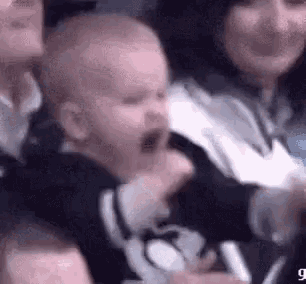

In [48]:
Image('https://i.pinimg.com/originals/9b/47/e7/9b47e788aeca53a2a202f387eebae195.gif')